### Visualize the `helmholtz_staircase` dataset

In [1]:
import glob

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# print the list of paths of files in the training set
set_path = "test"
paths = sorted(glob.glob(f"data/{set_path}/*.hdf5"))
print(paths)

['data/test/helmholtz_staircase_omega_006.hdf5', 'data/test/helmholtz_staircase_omega_02.hdf5', 'data/test/helmholtz_staircase_omega_04.hdf5', 'data/test/helmholtz_staircase_omega_06.hdf5', 'data/test/helmholtz_staircase_omega_08.hdf5', 'data/test/helmholtz_staircase_omega_09.hdf5', 'data/test/helmholtz_staircase_omega_11.hdf5', 'data/test/helmholtz_staircase_omega_13.hdf5', 'data/test/helmholtz_staircase_omega_15.hdf5', 'data/test/helmholtz_staircase_omega_17.hdf5', 'data/test/helmholtz_staircase_omega_18.hdf5', 'data/test/helmholtz_staircase_omega_20.hdf5', 'data/test/helmholtz_staircase_omega_21.hdf5', 'data/test/helmholtz_staircase_omega_23.hdf5', 'data/test/helmholtz_staircase_omega_24.hdf5', 'data/test/helmholtz_staircase_omega_25.hdf5']


In [9]:
# select the tenth path
p = paths[10]

# print the first layer of keys
with h5py.File(p, "r") as f:
    print(f.keys())

<KeysViewHDF5 ['boundary_conditions', 'dimensions', 'scalars', 't0_fields', 't1_fields', 't2_fields']>


In [10]:
# In 'boundary_conditions' is stored the information about the boundary conditions:
# /!\ : This dataset has a special boundary condition: a staircase:
with h5py.File(p, "r") as f:
    print("print bc available:", f["boundary_conditions"].keys())
    print("print attributes of the bc:", f["boundary_conditions"]["xy_wall"].attrs.keys())
    print("get the bc type:", f["boundary_conditions"]["xy_wall"].attrs["bc_type"])
# This dataset is special as it contains a mask of the domain, which is a staircase.

print bc available: <KeysViewHDF5 ['x_open_neumann', 'xy_wall', 'y_open_neumann']>
print attributes of the bc: <KeysViewHDF5 ['associated_dims', 'associated_fields', 'bc_type', 'sample_varying', 'time_varying']>
get the bc type: WALL


In [11]:
# Reminder: 't0_fields', 't1_fields', 't2_fields' are respectively scalar fields, vector fields and tensor fields
# print the different fields available in the dataset
with h5py.File(p, "r") as f:
    print("t0_fields:", f["t0_fields"].keys())
    print("t1_fields:", f["t1_fields"].keys())
    print("t2_fields:", f["t2_fields"].keys())

t0_fields: <KeysViewHDF5 ['mask', 'pressure_im', 'pressure_re']>
t1_fields: <KeysViewHDF5 []>
t2_fields: <KeysViewHDF5 []>


In [12]:
# The data is of shape (n_trajectories, n_timesteps, x, y)
# Get the first t0_field and save it as a numpy array
with h5py.File(p, "r") as f:
    pressure_re = f["t0_fields"]["pressure_re"][:] # HDF5 datasets can be sliced like a numpy array
    print("shape of the selected t0_field: ", pressure_re.shape)

shape of the selected t0_field:  (3, 50, 1024, 256)


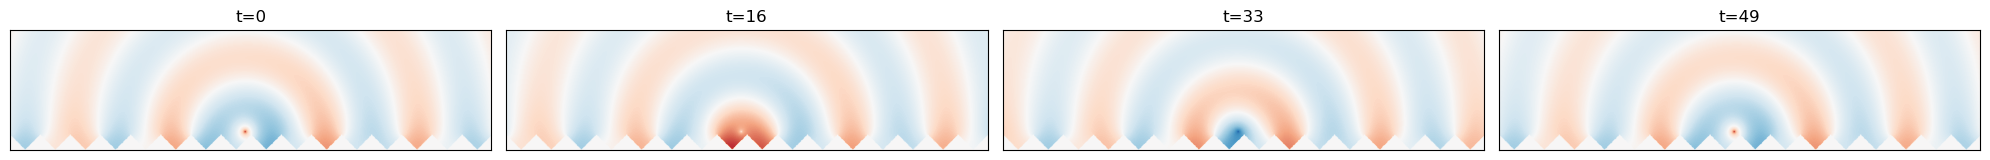

In [14]:
traj = 1  # select the trajectory
traj_toplot = pressure_re[traj]
# field is now of shape (n_timesteps, x, y).
# Let's do a subplot to plot it at t= 0, t= T/3, t= 2T/3 and t= T:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
T = traj_toplot.shape[0]

# same colorbar for all subplots:
normalize_plots = True
cmap = "RdBu_r"

if normalize_plots:
    vmin = np.nanmin(traj_toplot)
    vmax = np.nanmax(traj_toplot)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    for i, t in enumerate([0, T // 3, (2 * T) // 3, T - 1]):
        axs[i].imshow(traj_toplot[t].T, cmap=cmap, norm=norm)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(f"t={t}")
else:
    for i, t in enumerate([0, T // 3, (2 * T) // 3, T - 1]):
        axs[i].imshow(traj_toplot[t].T, cmap=cmap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(f"t={t}")
plt.tight_layout()